                              File Name                     SNR (dB)                      Peak Frequency (Hz)           Peak Power (dB/Hz)            Average Noise Power (dB/Hz)   Peak 50Hz Power (dB/Hz)       80Hz to 50Hz Ratio (dB)       
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SNR (dB)                      14.67                         14.62                         10.96                         17.03                         
Peak Frequency (Hz)           80.0                          80.0                          80.0                          80.0                          
Peak Power (dB/Hz)            -94.75                        -94.81                        -94.25                        -89.49                        
Average Noise Power (dB/Hz)   -109.41                       -109.43                       -105.

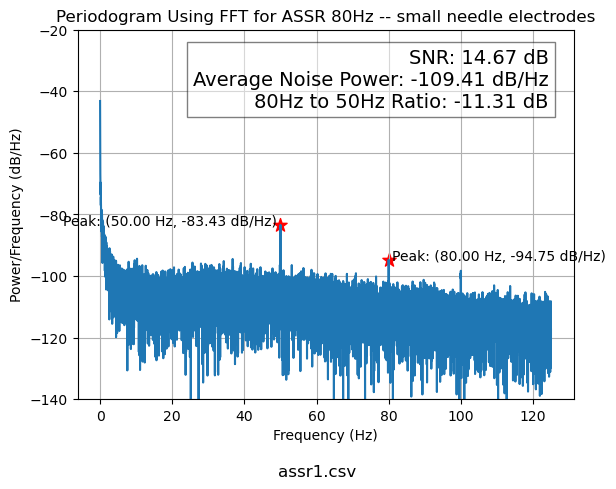

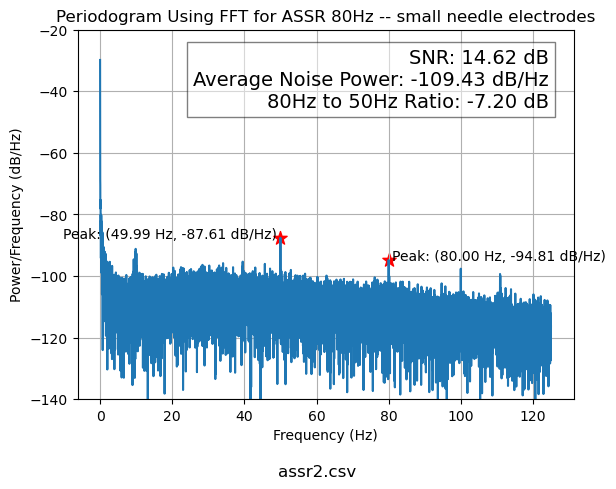

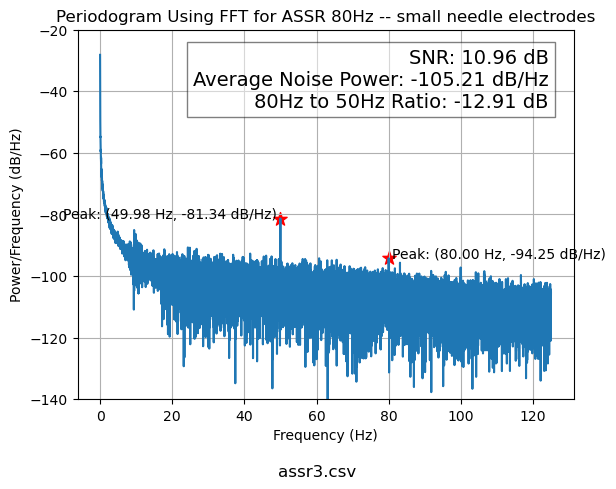

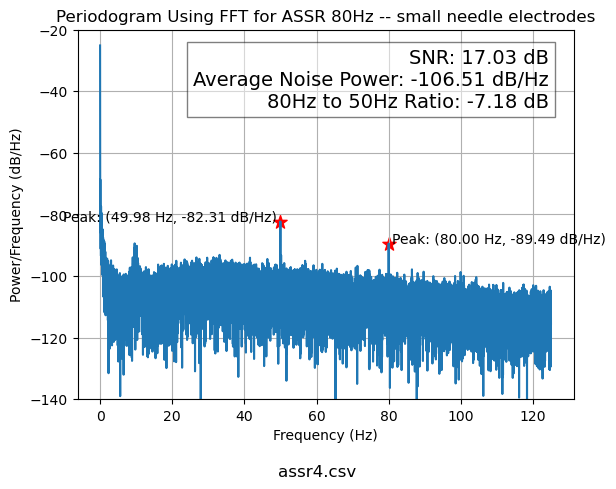

In [7]:
import os
from module_reloader import reload_module

reload_module('ASSR_function')

from ASSR_function import calculate_parameters, plot_results

# array to save the results
results = []

# Access the data files stored locally
base_dir = "/Users/ruochending/Documents/MATLAB/Measurements-03_07"
file_names = ["assr1.csv", "assr2.csv", "assr3.csv", "assr4.csv"]
file_paths = [os.path.join(base_dir, file_name) for file_name in file_names]

for file_path in file_paths:
    result = calculate_parameters(file_path, column_index=1, start_from=0, target_frequency=80, target_bandwidth=1)
    if result:
        snr, peak_freq, peak_power, noise_power_avg, peak_50Hz_power, eighty_to_fifty_ratio, freq_full, psdx_full, peak_50Hz_full = result
        
        results.append([os.path.basename(file_path), round(snr, 2), round(peak_freq, 2), round(peak_power, 2), round(noise_power_avg, 2), round(peak_50Hz_power, 2), round(eighty_to_fifty_ratio, 2)])

headers = ["File Name", "SNR (dB)", "Peak Frequency (Hz)", "Peak Power (dB/Hz)", "Average Noise Power (dB/Hz)", "Peak 50Hz Power (dB/Hz)", "80Hz to 50Hz Ratio (dB)"]

column_width = 30

# print column names
print("".ljust(column_width), end="")
for result in results:
    print(result[0].ljust(column_width), end="")
print("\n" + "-" * (column_width * (len(results) + 1)))

# print results
for i in range(1, len(headers)):
    print(headers[i].ljust(column_width), end="")
    for result in results:
        print(str(result[i]).ljust(column_width), end="")
    print()

# plot
for file_path in file_paths:
    result = calculate_parameters(file_path, column_index=1, start_from=0, target_frequency=80, target_bandwidth=1)
    if result:
        snr, peak_freq, peak_power, noise_power_avg, peak_50Hz_power, eighty_to_fifty_ratio, freq_full, psdx_full, peak_50Hz_full = result
        
        plot_results(freq_full, psdx_full, peak_freq, 10 ** (peak_power / 10), peak_50Hz_full, 10 ** (peak_50Hz_power / 10), snr, 10 ** (noise_power_avg / 10), eighty_to_fifty_ratio, file_name=os.path.basename(file_path), plot_title="Periodogram Using FFT for ASSR 80Hz -- small needle electrodes", y_range=(-140, -20))